### Chapter 3: Symbolic computing with SymPy

In [139]:
import sympy
from sympy import I, pi, oo

In [140]:
# enables MathJax to use render SymPy expressions
sympy.init_printing()

![symbol-attributes](pics/symbol-attributes.png)

In [141]:
x = sympy.Symbol("x")
y = sympy.Symbol("y", real=True)

In [142]:
y.is_real

True

In [143]:
x.is_real is None

True

In [144]:
sympy.Symbol("z", imaginary=True).is_real

False

In [145]:
x = sympy.Symbol("x")
y = sympy.Symbol("y", positive=True)

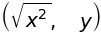

In [146]:
sympy.sqrt(x ** 2), sympy.sqrt(y ** 2)

In [147]:
n1 = sympy.Symbol("n")
n2 = sympy.Symbol("n", integer=True)
n3 = sympy.Symbol("n", odd=True)

In [148]:
sympy.cos(n1*pi), sympy.cos(n2*pi), sympy.cos(n3*pi)

In [149]:
# sympy.symbols -- creates multiple symbols in one function call
a, b, c = sympy.symbols("a, b, c", negative=True)
d, e, f = sympy.symbols("d, e, f", positive=True)

### Numbers
* Can't directly use Python objects for integers, floats
* Instead use Sympy.Integer, Sympy.Float (Not often needed, because Sympy auto-promotes numbers to class instances when needed.)

In [150]:
i = sympy.Integer(19)

In [151]:
i.is_Integer, i.is_real, i.is_odd

(True, True, True)

In [152]:
f = sympy.Float(2.3)

In [153]:
f.is_Integer, f.is_real, f.is_odd

(False, True, False)

In [154]:
i, f = sympy.sympify(19), sympy.sympify(2.3)

In [155]:
type(i), type(f)

(sympy.core.numbers.Integer, sympy.core.numbers.Float)

In [156]:
n = sympy.Symbol("n", integer=True)
i = sympy.Integer(19)

In [157]:
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

In [158]:
i.is_integer, i.is_Integer, i.is_positive, i.is_Symbol

(True, True, True, False)

In [159]:
# SymPy integers = arbitrary precision, no upper/lower bounds
# much easier to work with very large numbers.
i ** 50

In [160]:
sympy.factorial(100)

In [161]:
# like integers,
# SymPy floats = arbitrary precision.

"%.25f" % 0.3  # create a string represention with 25 decimals

'0.2999999999999999888977698'

In [162]:
sympy.Float(0.3, 25)

In [163]:
sympy.Float('0.3', 25)

### Rationals
* Fractions of two integers

In [164]:
sympy.Rational(11, 13)

In [165]:
r1 = sympy.Rational(2, 3)
r2 = sympy.Rational(4, 5)

In [166]:
r1*r2, r1/r2

### Constants & Special Symbols
![constants-specials](pics/constants-specials.png)

In [167]:
sympy.pi, sympy.E, sympy.EulerGamma, sympy.I, sympy.oo

### Functions
* Sympy understands *defined* & *undefined* functions, and *applied* & *unapplied* functions.

In [168]:
x, y, z = sympy.symbols("x, y, z")

In [169]:
f = sympy.Function("f")
type(f)

sympy.core.function.UndefinedFunction

In [170]:
f(x)

In [171]:
g = sympy.Function("g")(x, y, z)
g, g.free_symbols

In [172]:
sympy.sin

sin

In [173]:
sympy.sin(x)

In [174]:
sympy.sin(pi * 1.5)

In [175]:
n = sympy.Symbol("n", integer=True)

In [176]:
sympy.sin(pi * n)

In [177]:
# lambda (anonymous) functions = no name, but executable body.
h = sympy.Lambda(x, x**2)
h, h(5), h(1+x)

### Expressions
* Sympy expressions = represented as tree structures.
* symbols = leaves, nodes = math op class instances.

In [178]:
x = sympy.Symbol("x")

In [179]:
e = 1 + 2*x**2 + 3*x**3
e, e.args, e.args[1]

In [180]:
e.args[1].args[1]

In [181]:
e.args[1].args[1].args[0]

In [182]:
e.args[1].args[1].args[0].args

### Simplifications
![simplifications](pics/simplifications.png)

In [183]:
# simplification - (various methods used)
expr = 2*(x**2-x) - x*(x+1)
expr

In [184]:
sympy.simplify(expr), expr.simplify()

In [185]:
# simplification - trig identities

expr = 2 * sympy.cos(x) * sympy.sin(x)
expr, sympy.trigsimp(expr)

In [186]:
# simplification - power laws

expr = sympy.exp(x) * sympy.exp(y)
expr, sympy.powsimp(expr)

### Expand
* When sympy.simplify does not provide acceptable results

In [187]:
expr = (x+1)*(x+2)
sympy.expand(expr)

In [188]:
# trig=True for trigonometric expansions

sympy.sin(x+y).expand(trig=True)

In [189]:
# logarithmic expansions
a, b = sympy.symbols("a, b", positive=True)
sympy.log(a*b).expand(log=True)

In [190]:
# complex=True for separating real & imag parts of expression
sympy.exp(I*a + b).expand(complex=True)

In [191]:
# expanding exponent of a power expression
sympy.expand((a*b)**x, power_exp=True)

In [192]:
sympy.exp(I*(a-b)*x).expand(power_exp=True)

### Factoring

In [193]:
sympy.factor(x**2 - 1)

In [194]:
sympy.factor(x * sympy.cos(y) + sympy.sin(z) * x)

In [195]:
sympy.logcombine(sympy.log(a) - sympy.log(b))

In [196]:
expr = x + y + x * y * z
expr.factor()

In [197]:
expr.collect(x), expr.collect(y)

In [198]:
expr = sympy.cos(x + y) + sympy.sin(x - y)

In [199]:
expr.expand(trig=True).collect([sympy.cos(x), sympy.sin(x)]).collect(sympy.cos(y) - sympy.sin(y))

### Together, apart, cancel - rewriting of fractions

In [200]:
# rewrite fraction as a partial fraction
sympy.apart(1/(x**2 + 3*x + 2), x)

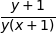

In [201]:
# combine partial fractions into single fraction
sympy.together(1 / (y * x + y) + 1 / (1+x))

In [202]:
# cancel shared factors btwn numerator, denominator
sympy.cancel(y / (y * x + y))

### Substitutions
* Most basic use case: method called on an expression. 1st argument = symbol/expr to be replaced; 2nd argument = new symbol/expr

In [203]:
(x+y).subs(x,y)

In [204]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

In [205]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

In [206]:
expr = x*y + z**2*x
values = {x: 1.25, y: 0.4, z: 3.2}
expr.subs(values)

### Numerical evaluation

In [207]:
sympy.N(1+pi), sympy.N(pi, 10); # 2nd argument = #significant digits

In [208]:
(x + 1/pi).evalf(7)

In [209]:
# evaluating across range of inputs -- can use loop construct
# slow. not rec'd.
expr = sympy.sin(pi*x*sympy.exp(x))
[expr.subs(x, xx).evalf(3) for xx in range(0, 10)]

In [210]:
# lambdify() -- preferred method
expr_func = sympy.lambdify(x, expr)
expr_func(1.0)

In [211]:
# expr_func expects numerical values -- symbols won't work
expr_func = sympy.lambdify(x, expr, 'numpy')

In [212]:
import numpy as np
xvalues = np.arange(0, 10)
expr_func(xvalues)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

### Calculus - Derivatives
* Derivative of a function: its rate of change at a given point.

In [213]:
f = sympy.Function('f')(x)

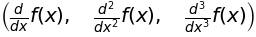

In [214]:
# higher-order derivs -- repeat symbol in arg list, 
# or specify #times derivation should occur via integer arg
sympy.diff(f,x), sympy.diff(f,x,x), sympy.diff(f,x,3)

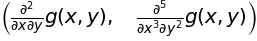

In [215]:
# multivariate functions

g = sympy.Function('g')(x,y)

g.diff(x,y), g.diff(x,3,y,2)

In [216]:
# defined functions

expr = x**4 + x**3 + x**2 + x + 1

expr.diff(x), expr.diff(x,x)

In [217]:
expr = (x+1)**3 * y**2 * (z-1)
expr.diff(x, y, z)

In [218]:
# trigonometric functions
expr = sympy.sin(x*y) * sympy.cos(x/2)

expr.diff(x)

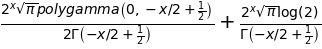

In [219]:
# special-purpose functions

expr = sympy.special.polynomials.hermite(x,0)

expr.diff(x).doit()

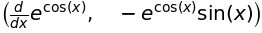

In [220]:
# definite expressions

d = sympy.Derivative(sympy.exp(sympy.cos(x)), x)

# evaluate derivative
d, d.doit()

### Integrals
* Two forms: definite (specified integration limits, can be interpreted as an area or volume) & indefinite (no integration limits)

In [221]:
a, b = sympy.symbols("a, b")
x, y = sympy.symbols('x, y')
f    = sympy.Function('f')(x)

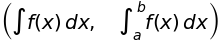

In [222]:
sympy.integrate(f), sympy.integrate(f,(x,a,b))

In [223]:
sympy.integrate(sympy.sin(x))

In [224]:
sympy.integrate(sympy.sin(x), (x,a,b))

In [225]:
# definite integrals can use limits to pos or neg infinity (oo).
sympy.integrate(sympy.exp(-x**2), (x,0,oo))

In [226]:
a,b,c = sympy.symbols("a, b, c", positive=True)

In [227]:
sympy.integrate(a * sympy.exp(-((x-b)/c)**2), (x, -oo, oo))

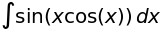

In [228]:
# SymPy can't solve all integrals.
# When this happens an instance of sympy.Integral, 
# representing the formal integral, is returned instead.
sympy.integrate(sympy.sin(x * sympy.cos(x)))

In [229]:
expr = sympy.sin(x*sympy.exp(y))
sympy.integrate(expr, x)

In [230]:
expr = (x+y)**2
sympy.integrate(expr,x)

In [231]:
sympy.integrate(expr,x,y)

In [232]:
sympy.integrate(expr,(x,0,1),(y,0,1))

### Series expansions

In [233]:
# Series expansion:
# Arbitrary function written as a polynomial
# with coefficients given by function's derivatives
# at point where expansion is made.

# Series expansion truncated at order=n (default=6)

x = sympy.Symbol("x")
f = sympy.Function("f")(x)
sympy.series(f,x)

                             ⎛  2      ⎞│         ⎛  3      ⎞│         ⎛  4   
                           2 ⎜ d       ⎟│       3 ⎜ d       ⎟│       4 ⎜ d    
                          x ⋅⎜───(f(x))⎟│      x ⋅⎜───(f(x))⎟│      x ⋅⎜───(f(
                             ⎜  2      ⎟│         ⎜  3      ⎟│         ⎜  4   
         ⎛d       ⎞│         ⎝dx       ⎠│x=0      ⎝dx       ⎠│x=0      ⎝dx    
f(0) + x⋅⎜──(f(x))⎟│    + ────────────────── + ────────────────── + ──────────
         ⎝dx      ⎠│x=0           2                    6                    24

   ⎞│         ⎛  5      ⎞│           
   ⎟│       5 ⎜ d       ⎟│           
x))⎟│      x ⋅⎜───(f(x))⎟│           
   ⎟│         ⎜  5      ⎟│           
   ⎠│x=0      ⎝dx       ⎠│x=0    ⎛ 6⎞
──────── + ────────────────── + O⎝x ⎠
                  120                

In [234]:
# to specify point around which to expand, provide x0 keyword
x0 = sympy.Symbol("{x_0}")

In [235]:
# note order object on end of result - 
f.series(x, x0, n=2)

                       ⎛ d        ⎞│            ⎛           2           ⎞
f({x_0}) + (x - {x_0})⋅⎜───(f(ξ₁))⎟│         + O⎝(x - {x_0}) ; x → {x_0}⎠
                       ⎝dξ₁       ⎠│ξ₁={x_0}                             

In [236]:
# use remove0() to remove order term
f.series(x, x0, n=2).removeO()

            ⎛ d        ⎞│                   
(x - {x_0})⋅⎜───(f(ξ₁))⎟│         + f({x_0})
            ⎝dξ₁       ⎠│ξ₁={x_0}           

In [237]:
# some well-known series expansions:
sympy.cos(x).series()

In [238]:
sympy.sin(x).series()

In [239]:
sympy.exp(x).series()

In [240]:
(1/(1+x)).series()

In [241]:
expr = sympy.cos(x) / (1 + sympy.sin(x * y))

expr.series(x,n=4), expr.series(y,n=4)

In [242]:
expr.series(y).removeO().series(x).removeO().expand()

### Limits
* Value of a function as a dependent variable approaches a specific value (or approaches pos/neg infinity).

In [243]:
sympy.limit(sympy.sin(x)/x,x,0)

In [244]:
f = sympy.Function('f')
x, h = sympy.symbols("x, h")

In [245]:
diff_limit = (f(x+h)-f(x))/h

In [246]:
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

In [247]:
sympy.limit(diff_limit.subs(f, sympy.sin), h, 0)

In [248]:
# use case; finding asymptotic behavior in a function
expr = (x**2-3*x)/(2*x-2)

p = sympy.limit(expr/x,   x, oo)
q = sympy.limit(expr-p*x, x, oo)

p,q

# result: asymptotic behavior of f(x) as x becomes large:
# f(x) --> x/2-1

## Sums and products

In [249]:
n = sympy.symbols("n", integer=True)
x = sympy.Sum(1/(n**2), (n, 1, oo))

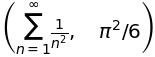

In [250]:
x, x.doit()

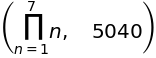

In [251]:
x = sympy.Product(n,(n,1,7))
x, x.doit()

In [252]:
x = sympy.Symbol("x")

In [253]:
sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo)).doit().simplify()

### Equation Solving

In [254]:
x = sympy.symbols("x")

In [255]:
sympy.solve(x**2 + 2*x - 3)

In [256]:
a,b,c = sympy.symbols("a, b, c")

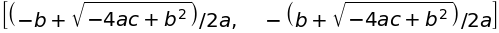

In [257]:
sympy.solve(a*x**2 + b*x + c, x)

In [258]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

In [259]:
sympy.solve(sympy.exp(x) + 2*x, x)

In [260]:
# case of SymPy being unable to solve.
# Return 'formal solution' or error if no method is available.
sympy.solve(x**5 - x**2 + 1, x)

In [261]:
# dict=True -- returns solution in dictionary format
eq1 = x + 2 * y - 1
eq2 = x - y + 1

sympy.solve([eq1, eq2], [x, y], dict=True)

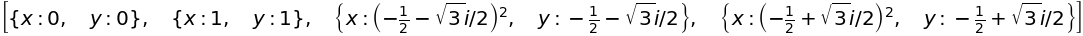

In [262]:
eq1 = x**2 - y
eq2 = y**2 - x

sols = sympy.solve([eq1, eq2], [x, y], dict=True)
sols

In [263]:
# dict format can then be used in calls to subs

[eq1.subs(sol).simplify() == 0 and eq2.subs(sol).simplify() == 0 
 for sol in sols]

[True, True, True, True]

### Linear algebra
![sympy-matrix-ops](pics/sympy-matrix-ops.png)

In [264]:
sympy.Matrix([1,2])

⎡1⎤
⎢ ⎥
⎣2⎦

In [265]:
sympy.Matrix([[1,2]])

[1  2]

In [266]:
sympy.Matrix([[1, 2], [3, 4]])

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [267]:
sympy.Matrix(3, 4, lambda m,n: 10 * m + n)

⎡0   1   2   3 ⎤
⎢              ⎥
⎢10  11  12  13⎥
⎢              ⎥
⎣20  21  22  23⎦

In [268]:
# Sympy matrix elements can be symbolic expressions.
a, b, c, d = sympy.symbols("a, b, c, d")

In [269]:
M = sympy.Matrix([[a, b], [c, d]])
M, M*M

⎛        ⎡ 2                  ⎤⎞
⎜⎡a  b⎤, ⎢a  + b⋅c   a⋅b + b⋅d⎥⎟
⎜⎢    ⎥  ⎢                    ⎥⎟
⎜⎣c  d⎦  ⎢                  2 ⎥⎟
⎝        ⎣a⋅c + c⋅d  b⋅c + d  ⎦⎠

In [270]:
x = sympy.Matrix(sympy.symbols("x_1, x_2"))
M*x

⎡a⋅x₁ + b⋅x₂⎤
⎢           ⎥
⎣c⋅x₁ + d⋅x₂⎦

In [271]:
p,q = sympy.symbols("p, q")
M = sympy.Matrix([[1,p],[q,1]])
M

⎡1  p⎤
⎢    ⎥
⎣q  1⎦

In [272]:
b = sympy.Matrix(sympy.symbols("b_1, b_2"))
b

⎡b₁⎤
⎢  ⎥
⎣b₂⎦

In [273]:
M.solve(b)

⎡   ⎛  p⋅q       ⎞     b₂⋅p  ⎤
⎢b₁⋅⎜──────── + 1⎟ - ────────⎥
⎢   ⎝-p⋅q + 1    ⎠   -p⋅q + 1⎥
⎢                            ⎥
⎢       b₁⋅q        b₂       ⎥
⎢   - ──────── + ────────    ⎥
⎣     -p⋅q + 1   -p⋅q + 1    ⎦

In [274]:
M.LUsolve(b)

⎡     p⋅(-b₁⋅q + b₂)⎤
⎢b₁ - ──────────────⎥
⎢        -p⋅q + 1   ⎥
⎢                   ⎥
⎢    -b₁⋅q + b₂     ⎥
⎢    ──────────     ⎥
⎣     -p⋅q + 1      ⎦

In [275]:
M.inv()*b

⎡   ⎛  p⋅q       ⎞     b₂⋅p  ⎤
⎢b₁⋅⎜──────── + 1⎟ - ────────⎥
⎢   ⎝-p⋅q + 1    ⎠   -p⋅q + 1⎥
⎢                            ⎥
⎢       b₁⋅q        b₂       ⎥
⎢   - ──────── + ────────    ⎥
⎣     -p⋅q + 1   -p⋅q + 1    ⎦